<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from models.models import *
from models.train import *
from models.utils import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

In [3]:
limit_mem()

In [42]:
G = create_generator()
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 6272)              633472    
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 128)       409728    
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        204864    
__________

In [43]:
D = create_discriminator()
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 128)       3328      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 64)          204864    
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3137      
Total params: 211,329
Trainable params: 211,329
Non-trainable params: 0
_________________________________________________________________


In [44]:
C = compile_and_create_combined(G, D)

In [45]:
C.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 100)               0         
_________________________________________________________________
model_16 (Model)             (None, 28, 28, 1)         1248321   
_________________________________________________________________
model_17 (Model)             (None, 1)                 211329    
Total params: 1,459,650
Trainable params: 1,248,321
Non-trainable params: 211,329
_________________________________________________________________


In [61]:
dl, gl = train(D, G, C, 10, 100)

100%|██████████| 10/10 [11:21<00:00, 68.19s/it]


Epoch: 1


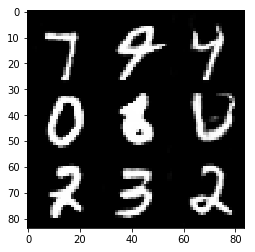

Epoch: 2


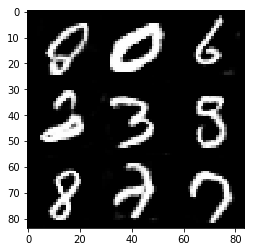

Epoch: 3


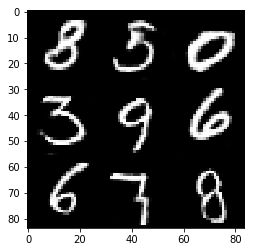

Epoch: 4


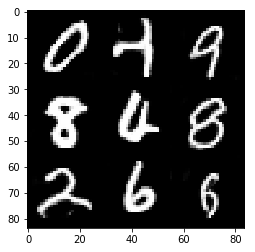

Epoch: 5


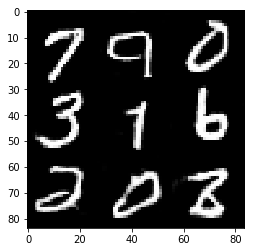

Epoch: 6


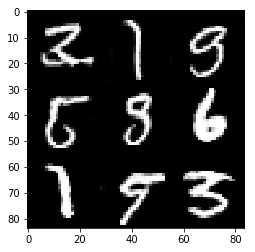

Epoch: 7


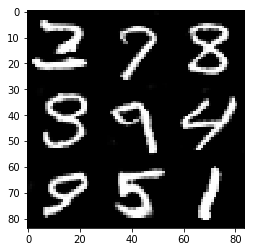

Epoch: 8


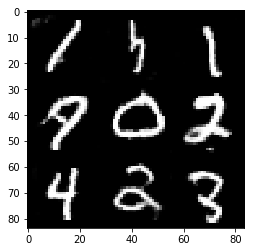

Epoch: 9


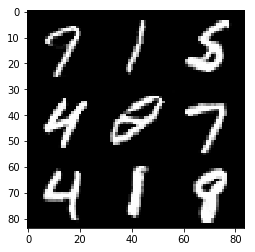

Epoch: 10


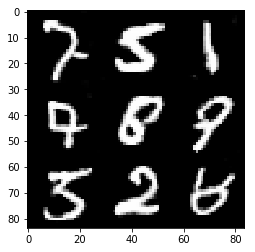

In [62]:
for i, fn in enumerate(sorted(glob('./images/*'))):
    print('Epoch:', i + 1)
    img = Image.open(fn)
    plt.imshow(img, cmap='gray'); plt.show()

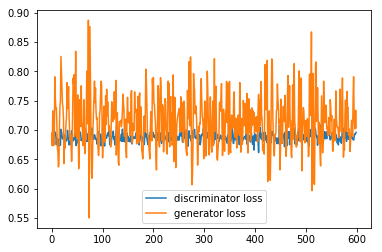

In [60]:
plot_losses(dl, gl)